In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from S00_utils import plot_res, store_results


In [2]:
# CLF = "svr"
CLF = "gbr"

In [3]:
df = pd.read_excel("output/S21__2025-04-21-052727.xlsx")
df = df.set_index("Unnamed: 0")
df.index.names = ["id"]
df.head()

,m1,m2,m3,s1__autocorrelation__lag_8,s1__autocorrelation__lag_9,s1__autocorrelation__lag_7,s1__autocorrelation__lag_6,s1__autocorrelation__lag_5,s1__autocorrelation__lag_4,s1__longest_strike_above_mean,...,s1__ar_coefficient__coeff_3__k_10,s1__approximate_entropy__m_2__r_0.1,s1__lempel_ziv_complexity__bins_3,s1__partial_autocorrelation__lag_4,"s1__fft_coefficient__attr_""abs""__coeff_7","s1__agg_autocorrelation__f_agg_""var""__maxlag_40",s1__spkt_welch_density__coeff_2,y1,y2,y3
id,,,,,,,,,,,,,,,,,,,,,
E001,150.223716,1176.177278,1.142097,-0.305434,-0.519191,-0.074829,0.159896,0.385790,0.590387,14,...,0.183996,0.158567,0.204152,-0.360084,0.293617,0.499488,5.886812e-08,55.460434,1.065917,114.578620
E002,102.534268,1483.654982,1.104716,-0.243785,-0.454262,-0.021002,0.202836,0.416423,0.608972,14,...,0.184370,0.144742,0.203008,-0.344364,6.142373,0.477743,3.643621e-06,50.640306,1.285666,124.651484
E003,119.890549,1254.897451,2.162773,-0.329006,-0.543405,-0.095913,0.142612,0.373002,0.582151,14,...,0.184036,0.144268,0.208163,-0.364611,26.783283,0.506435,1.590028e-04,50.832405,1.154859,57.018054
E004,162.830799,1302.043195,1.308283,-0.065152,-0.266498,0.138913,0.337187,0.521401,0.683873,16,...,0.187213,0.137326,0.193662,-0.355441,33.227591,0.460547,7.926165e-04,62.476545,1.025161,132.221218
E005,165.720956,1154.482314,1.566830,-0.304881,-0.518177,-0.074836,0.159321,0.384728,0.589003,14,...,0.183978,0.128546,0.192440,-0.357588,11.439470,0.497940,1.462831e-04,57.634438,1.043776,92.160269


In [4]:
colsY = ["y1", "y2", "y3"]
colsX = [c for c in df.columns if c not in colsY]

X = df[colsX]
Y = df[colsY]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print(Y_train.shape)

(70, 3)


In [5]:
scX = StandardScaler()
X_train_std = scX.fit_transform(X_train)
X_test_std = scX.transform(X_test)

scY = StandardScaler()
Y_train_std = scY.fit_transform(Y_train)
Y_test_std = scY.transform(Y_test)

In [6]:
if CLF == "gbr":
    paramSet = {
        "ex1": {"n_estimators": 50, "learning_rate": 1.0, "max_depth": 1},
        "ex2": {"n_estimators": 50, "learning_rate": 1.0, "max_depth": 3},
        "ex3": {"n_estimators": 50, "learning_rate": 1.0, "max_depth": 10},
        "ex4": {"n_estimators": 50, "learning_rate": 1.0, "max_depth": 1},
        "ex5": {"n_estimators": 100, "learning_rate": 1.0, "max_depth": 1},
        "ex6": {"n_estimators": 200, "learning_rate": 1.0, "max_depth": 1},
    }

    params = paramSet["ex2"]
    base = GradientBoostingRegressor(**params)


elif CLF == "svr":
    paramSet = {
        "r1": {
            "kernel": "rbf",
            "C": 1,
            "epsilon": 0.1,
        },
        "r2": {
            "kernel": "rbf",
            "C": 1,
            "epsilon": 1,
        },
        "r3": {
            "kernel": "rbf",
            "C": 1,
            "epsilon": 10,
        },
        "r4": {
            "kernel": "rbf",
            "C": 1,
            "epsilon": 100,
        },
        "r5": {
            "kernel": "rbf",
            "C": 100,
            "epsilon": 1,
        },
    }

    params = paramSet["r1"]
    base = SVR(**params)
else:
    raise Exception("Error")

In [7]:
regressor = MultiOutputRegressor(base)

In [8]:
regressor.fit(X_train_std, Y_train_std)
Y_train_pred = regressor.predict(X_train_std)
Y_test_pred = regressor.predict(X_test_std)

,MSE Train,MSE Test,R2 Train,R2 Test
0,2.611835e-14,0.222262,1.0,0.814149
1,3.920831e-15,0.314220,1.0,0.609671
2,2.238265e-14,0.216121,1.0,0.757552


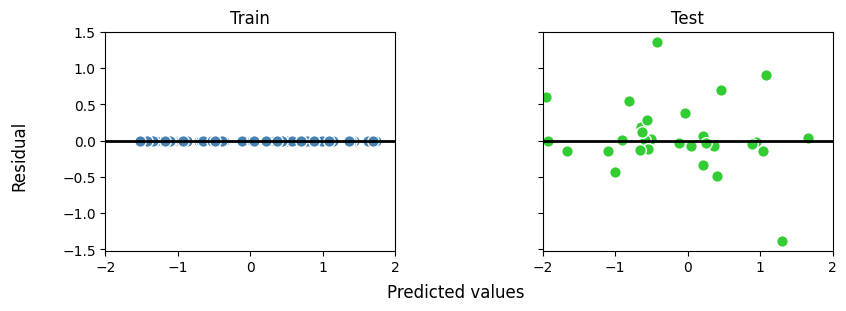

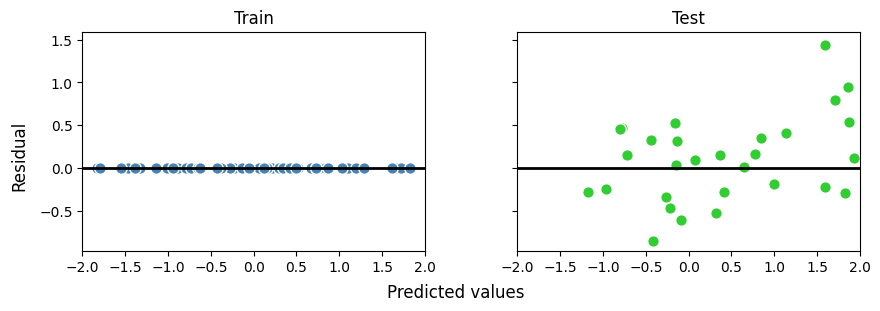

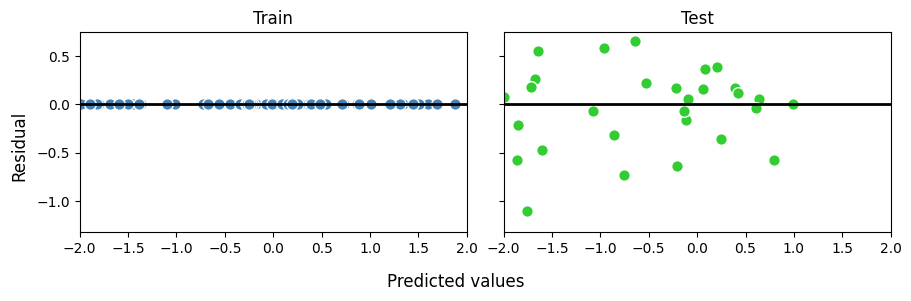

In [9]:
resArr = []
for i in range(Y.shape[1]):
    y_train = Y_train_std[:, i]
    y_test = Y_test_std[:, i]
    y_train_pred = Y_train_pred[:, i]
    y_test_pred = Y_test_pred[:, i]
    plot_res(y_train, y_test, y_train_pred, y_test_pred)
    res = store_results(y_train, y_test, y_train_pred, y_test_pred)
    resArr.append(res)

dfRes = pd.DataFrame.from_dict(resArr)
dfRes
